# n-Layer Neural Network on MNIST dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import os

In [2]:
train_data_dir = './Dataset/TrainValData/'
test_data_dir = './Dataset/TestData/'

In [3]:
def check_and_download_mnist(train_data_dir, test_data_dir):
    """ Cehcks if MNIST training and testing data is present at given paths. Downloads and extracts if not.
        Input:
            train_data_dir: string, path for training data
            test_data_dir: string, path for testing data
        Output:
            None
    """

    os.makedirs(train_data_dir, exist_ok=True)
    os.makedirs(test_data_dir, exist_ok=True)
    
    if len(os.listdir(train_data_dir)) == 0:
        print("Training dataset not found, downloading and extracting MNIST dataset...")
        train_images_file = os.path.join(train_data_dir, 'train-images-idx3-ubyte.gz')
        train_labels_file = os.path.join(train_data_dir, 'train-labels-idx1-ubyte.gz')

        # Downloading dataset
        os.system('wget http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz -O {}'.format(train_images_file))
        os.system('wget http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz -O {}'.format(train_labels_file))

        # Extracting dataset
        os.system('gzip -d {}'.format(train_images_file))
        os.system('gzip -d {}'.format(train_labels_file))

        print("Training dataset available at path: {}".format(train_data_dir))

    if len(os.listdir(test_data_dir)) == 0:
        print("Testing dataset not found, downloading and extracting MNIST dataset...")
        test_images_file = os.path.join(test_data_dir, 't10k-images-idx3-ubyte.gz')
        test_labels_file = os.path.join(test_data_dir, 't10k-labels-idx1-ubyte.gz')

        # Downloading dataset
        os.system('wget http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz -O {}'.format(test_images_file))
        os.system('wget http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz -O {}'.format(test_labels_file))

        # Extracting dataset
        os.system('gzip -d {}'.format(test_images_file))
        os.system('gzip -d {}'.format(test_labels_file))

        print("Testing dataset available at path: {}".format(test_data_dir))

In [4]:
def read_images_from_file(filename):
    with open(filename,'rb') as f:
        magic = f.read(4)
        magic = int.from_bytes(magic,'big')
        print("Magic is:", magic)

        # Number of images in next 4 bytes
        noimg = f.read(4)
        noimg = int.from_bytes(noimg,'big')
        print("Number of images is:", noimg)

        # Number of rows in next 4 bytes
        norow = f.read(4)
        norow = int.from_bytes(norow,'big')
        print("Number of rows is:", norow)
        
        # Number of columns in next 4 bytes
        nocol = f.read(4)
        nocol = int.from_bytes(nocol,'big')
        print("Number of cols is:", nocol)

        images = [] # create array
        #for loop
        for i in range(noimg):
            rows = []
            for r in range(norow):
                cols = []
                for c in range(nocol):
                    cols.append(int.from_bytes(f.read(1), 'big')) # append the current byte for every column
                rows.append(cols) # append columns array for every row
            images.append(rows) # append rows for every image
    return images

In [5]:
def read_labels_from_file(filename):
    with open(filename,'rb') as f: #use gzip to open the file in read binary mode
        magic = f.read(4) # magic number is the first 4 bytes
        magic = int.from_bytes(magic,'big') # Convert bytes to integers.
        print("Magic is:", magic) # print to console

        # the same as above but with labels
        nolab = f.read(4)
        nolab = int.from_bytes(nolab,'big')
        print("Num of labels is:", nolab)
        # for looping through labels
        labels = [f.read(1) for i in range(nolab)]
        labels = [int.from_bytes(label, 'big') for label in labels]
    return labels

In [6]:
def read_mnist_and_split_data(training_images_file, training_labels_file, testing_images_file,
                              testing_labels_file, trainval_split_ratio = 0.9):
    """ Reads MNIST data and devides it into training, validation and testing data
        Input:
            training_images_file: string, path to the training images file
            training_labels_file: string, path to the training labels file
            testing_images_file: string, path to the testing images file
            testing labels file: string, path to the testing lablels file
            trainval_split_ratio: float, percentage of training images
        Output:
            training_images: list of list, contains all the training images
            training_labels: list of list, contains all the training labels
            val_images: list of list, contains all the training images
            val_labels: list of list, contains all the training labels
            testing_images: list of list, contains all the training images
            testing_labels: list of list, contains all the training labels   
    """
    trainval_images = read_images_from_file(training_images_file)
    trainval_labels = read_labels_from_file(training_labels_file)

    testing_images = read_images_from_file(testing_images_file)
    testing_labels = read_labels_from_file(testing_labels_file)

    total_trainval_images = len(trainval_images)

    num_training_images = int(total_trainval_images*trainval_split_ratio)
    num_val_images = total_trainval_images - num_training_images

    training_images = trainval_images[0:num_training_images]
    training_labels = trainval_labels[0: num_training_images]

    val_images = trainval_images[num_training_images:]
    val_labels = trainval_labels[num_training_images:]

    print("Total image-label pair in training data: {}\nTotal image_label pair in validation data: {}".format(
        num_training_images, num_val_images))

    print("Total image-label pair in testing data: {}".format(len(testing_images)))
    
    return training_images, training_labels, val_images, val_labels, testing_images, testing_labels

In [7]:
check_and_download_mnist(train_data_dir, test_data_dir)

training_images_file = os.path.join(train_data_dir, 'train-images-idx3-ubyte')
training_labels_file = os.path.join(train_data_dir, 'train-labels-idx1-ubyte')

testing_images_file = os.path.join(test_data_dir, 't10k-images-idx3-ubyte')
testing_labels_file = os.path.join(test_data_dir, 't10k-labels-idx1-ubyte')

training_images, training_labels, val_images, val_labels, testing_images, testing_labels = read_mnist_and_split_data(
    training_images_file, training_labels_file, testing_images_file, testing_labels_file, trainval_split_ratio=0.9)

Magic is: 2051
Number of images is: 60000
Number of rows is: 28
Number of cols is: 28
Magic is: 2049
Num of labels is: 60000
Magic is: 2051
Number of images is: 10000
Number of rows is: 28
Number of cols is: 28
Magic is: 2049
Num of labels is: 10000
Total image-label pair in training data: 54000
Total image_label pair in validation data: 6000
Total image-label pair in testing data: 10000


In [8]:
class Neural_Network:
    """ Class which will define and work with neural network
    """
    def __init__(self, architecture, random_seed=3):
        """ Initializtion of neural network
            Input:np.array(img)
                architecture metadata: dictionary, contains the definiation of neural network
                hyper_prams: dict, contains the hyper parameters of neural network
                random_seed: int, for setting the random seed
            Output:
                None
        """
        np.random.seed(random_seed)
        self.num_layers = len(architecture)
        self.NN_params = {}
        self.architecture = architecture
        
        
    def initialze_params(self, nn_architecture):
        """ Initializes the parameters of neural network """
        NN_params = {}
        
        for layer_idx, layer in enumerate(nn_architecture):
            num_layer_input = layer['input_dim']
            num_layer_output = layer['output_dim']
            
            # Initializing weights and bias for current layer
            NN_params['Weights_'+str(layer_idx)] = np.random.randn(num_layer_output, num_layer_input) * 0.1
            NN_params['Bias_'+str(layer_idx)] = np.ones((num_layer_output, 1)) * 0.1
        
        return NN_params
    
    
    def relu(self, z):
        """ ReLu activation function """
        return np.maximum(z, 0.0)
    
    
    def sigmoid(self, z):
        """ Sigmoid activation function """
        return 1.0/(1.0+np.exp(-z))
    
    
    def backward_relu(self, dA, Z):
        """ Gradient calculation of ReLu function """
        dZ = np.array(dA, copy = True)
#         dZ = np.ones(dA.shape)
        dZ[Z <= 0.0] = 0.0;
        return dZ;
    
    def backward_sigmoid(self, dA, Z):
        """ Gradient calculation of sigmoid function """ 
        sig_Z = self.sigmoid(Z)
        return dA * sig_Z * (1-sig_Z)
    
    
    def single_layer_forward_propagation(self, input_values, weights, bias, activation):
        """ Calculates the forard propagation of a single layer
            Input:
                input_values: array, input values to current layer
                weights: array, weights of current layer
                bias: array, bias of current layer
                activation: string, activation function to be used for current layer
            Output:
                A_curr: array, output values after appying activation function
                Z_curr: array, output values without applying activation function
        """
        
        Z_curr = np.dot(weights, input_values) + bias
        
        if activation == "relu":
            activation_func = self.relu
        elif activation == "sigmoid":
            activation_func = self.sigmoid
        else:
            raise Exception("Provided activation function is not supported")
            
        A_curr = activation_func(Z_curr)
        
        return A_curr, Z_curr
    
    
    def forward_propagation_NN(self, input_data, NN_params, architecture):
        """ Used for complete forward propagation of neural network 
            Input:
                input_data: array, data to be used for forward propagation
                NN_params: dict of arrays, Neural Network parameters
                architecture: dict, definition of the NN
            Output:
                output_current: array, output values of last layer after applying activation function
                state_dict: dict, dictionary holding various intermediate outputs
        """
        
        state_dict = {}
        A_curr = input_data
        
        for layer_idx, layer in enumerate(architecture):
            A_prev = A_curr
            
            activation_function = layer["activation"]
            W_current = NN_params["Weights_"+str(layer_idx)]
            B_current = NN_params["Bias_"+str(layer_idx)]
            A_curr, Z_curr = self.single_layer_forward_propagation(A_prev, W_current, B_current, 
                                                                   activation_function)
    
            state_dict["A_"+str(layer_idx)] = A_prev
            state_dict["Z_"+str(layer_idx)] = Z_curr
            
        return A_curr, state_dict

    
    def calc_classification_loss(self, Y_pred, Y_GT):
        """ Calculates the classification loss value of Neural Network
            Input: 
                Y_pred: array, predictions given by Neural Network, on a set samples 
                Y_GT: array, ground truth values of the samples
            Output:
                loss: float, loss value of neural netowrk with current prediction
        """
        
        num_samples = Y_pred.shape[1]
        loss = (-1/num_samples) * (np.dot(Y_GT, np.log(Y_pred).T) + np.dot((1.0-Y_GT), 
                                                                                  np.log(1.0-Y_pred).T))
        
        loss = np.squeeze(loss)
        loss = np.sum(loss)
        return loss
    
    
    def calc_model_accuracy(self, Y_pred, Y_GT):
        """ Calculated and prints model accuracy for given set of prams and samples
            Input:
                Y_pred: array, predictions given by Neural Network, on a set samples 
                Y_GT: array, ground truth values of the samples
            Output:
                None
        """
        Y_pred = np.argmax(Y_pred, axis=0)
        Y_GT = np.argmax(Y_GT, axis=0)
        accuracy = np.mean(Y_pred == Y_GT)
        return accuracy

    def single_layer_backward_propagation(self, dA_curr, W_curr, b_curr, Z_current, A_prev, activation):
        """ Calculated backward propagation of a single layer 
            Input:
                dA_current: array, derivatives of current layer after application of activaton function
                W_curr: array, weights of current layer
                b_current: array, bias of current layer
                Z_current: array, output of current layer before application of activation function
                A_current: array, output of previous layer after application of activation function
                activation: string, activation function used in current layer
            Output:
                dA_prev: array, backward activation for current layer
                dW_curr: array, derivatives of weights of current layer
                db_curr, array, derivatives of bias of current layer
        """
        
        num_samples = dA_curr.shape[1]
        
        if activation == "relu":
            backward_activation_func = self.backward_relu
        elif activation == "sigmoid":
            backward_activation_func = self.backward_sigmoid
        else:
            raise Exception("Provided activation function is not supported")
            
        dZ_curr = backward_activation_func(dA_curr, Z_current)
        dW_curr = np.dot(dZ_curr, A_prev.T) / num_samples
        db_curr = np.sum(dZ_curr, axis=1, keepdims=True) / num_samples
        dA_prev = np.dot(W_curr.T, dZ_curr)
        
        
        return dA_prev, dW_curr, db_curr
    
    
    def backward_propagation_NN(self, Y_pred, Y_GT, state_dict, NN_params, architecture):
        """ Calculates the backward propagtion of NN
            Input:
                Y_pred: array, predictions output of the samples given by NN
                Y_GT: array, ground truth values of the samples
                state_dict: dict, hoolding the states of NN during forward propagation
                NN_params: dict, holding all the weights and bias parameters of the NN
                architecture, dict, holding the definition of the NN
            Output:
                grad_values: dict, holding all the graident values of every parameter of the NN
        """
        grad_values = {}
        num_samples = Y_pred.shape[1]
        
        dA_prev = - np.divide(Y_GT, Y_pred) + np.divide(1-Y_GT, 1-Y_pred)
        
        for layer_idx, layer in reversed(list(enumerate(architecture))):
            activation = layer["activation"]
            
            dA_curr = dA_prev
            
            A_prev = state_dict["A_"+str(layer_idx)]
            Z_curr = state_dict["Z_"+str(layer_idx)]
            W_curr = NN_params["Weights_"+str(layer_idx)]
            b_curr = NN_params["Bias_"+str(layer_idx)]
            
            dA_prev, dW_curr, db_curr = self.single_layer_backward_propagation(dA_curr, W_curr, b_curr, Z_curr, 
                                                                               A_prev, activation)
            
            grad_values["dW_"+str(layer_idx)] = dW_curr
            grad_values["db_"+str(layer_idx)] = db_curr
            
        return grad_values
    
    
    def update_params(self, NN_params, grads, architecture, learning_rate):
        """ Updates the paramters of neural network as per gradient descent algorithm
            Input:
                grads: dict, holding all the gradient values of NN parameters
                architecture: dictm holding the NN architecture
                learning_rate:, float, learning rate to be used for gradient descent optimization
            Output:
                None
        """
        
        for layer_idx, layer in enumerate(architecture):
            NN_params["Weights_"+str(layer_idx)] -= learning_rate * grads["dW_"+str(layer_idx)]
            NN_params["Bias_"+str(layer_idx)] -= learning_rate * grads["db_"+str(layer_idx)]
            
        return NN_params
    
    
    def pre_process_data(self, images, labels=None):
        """ Pre-process the data for feeding into the neural network 
            Input:
                images: list of array, holds all the images
                labels: list, holds the labels for the given images
            Ouput:
                processed_images: list of array, processed images for architecture
                processed_labels: list, processed labels for architecture
        """
        processed_images, processed_labels = [], []
        if labels != None:
            for img, label in zip(images, labels):
                processed_images.append(np.array(img).flatten()/128.)
                one_hot_array = np.zeros(10)
                one_hot_array[label] = 1
                processed_labels.append(one_hot_array)
            return np.array(processed_images).T, np.array(processed_labels).T
        else:
            for img in images:
                processed_images.append(np.array(img).flatten())
            return np.array(processed_images).T
            
    def train(self, train_images, train_labels, valid_images, valid_labels, epochs, learning_rate):
        """ Training the neural network
            Input:
                train_images: array, contains all the training images
                train_label: array, contains all the training labels
                epochs: int, number of epochs the model is to be trained
                learning_rate: float, learning rate for optimization
        """
        
        architecture = self.architecture
        params = self.initialze_params(architecture)
        train_cost_history, val_cost_history = [], []
        accuracy_history_train, accuracy_history_valid = [], []
        
        train_images_processed, train_labels_processed = self.pre_process_data(train_images, train_labels)
        valid_images_processed, valid_labels_processed = self.pre_process_data(valid_images, valid_labels)
        
        for i in tqdm(range(epochs)):
            # Training
            Y_pred_train, current_state = self.forward_propagation_NN(train_images_processed, params, architecture)
            train_cost = self.calc_classification_loss(Y_pred=Y_pred_train, Y_GT=train_labels_processed)
            train_cost_history.append(train_cost)
            
            accuracy_train = self.calc_model_accuracy(Y_pred_train, train_labels_processed)
            accuracy_history_train.append(accuracy_train)
            
            grad_values = self.backward_propagation_NN(Y_pred_train, train_labels_processed, current_state, 
                                                       params, architecture)
            params = self.update_params(params, grad_values, architecture, learning_rate)
            
            # Validation
            
            Y_pred_valid, _ = self.forward_propagation_NN(valid_images_processed, params, architecture)
            valid_cost = self.calc_classification_loss(Y_pred_valid, valid_labels_processed)
            val_cost_history.append(valid_cost)
            
            accuracy_valid = self.calc_model_accuracy(Y_pred_valid, valid_labels_processed)
            accuracy_history_valid.append(accuracy_valid)
            
            
        
        return params, train_cost_history, val_cost_history, accuracy_history_train, accuracy_history_valid
    
    def predict(self, images, model_params):
        """ This function is used for prediction 
            Input: 
                images: list of array, images for prediction
                model_params, dict of arrays, trained parameters of the model
            Output:
                y_pred: list of arrays, class probablity distribution as given by neural network
        """
        images_processed = self.pre_process_data(images)
        Y_pred, _ = self.forward_propagation_NN(images_processed, model_params, self.architecture)
        
        return Y_pred
    
    def get_class(self, labels):
        """ Converts the class probablities of labels into absolute class
            Input:
                labels: array, class probablities
            Output:
                class: int, class with maximum probablity in given labels
        """
        return np.argmax(labels, axis=0)

In [9]:
nn_architecture = [
    {"input_dim": 784, "output_dim": 392, "activation": "relu"},
    {"input_dim": 392, "output_dim": 196, "activation": "relu"},
    {"input_dim": 196, "output_dim": 98, "activation": "relu"},
    {"input_dim": 98, "output_dim": 49, "activation": "relu"},
    {"input_dim": 49, "output_dim": 24, "activation": "relu"},
    {"input_dim": 24, "output_dim": 10, "activation": "sigmoid"},
]

In [10]:
MNIST_NN = Neural_Network(architecture=nn_architecture)

In [11]:
trained_params, cost_history_train, cost_history_valid, accuracy_history_train, accuracy_history_valid = MNIST_NN.train(training_images, training_labels, val_images, 
                                                                val_labels, 1000, 1e-2)

100%|██████████| 1000/1000 [35:21<00:00,  2.12s/it]


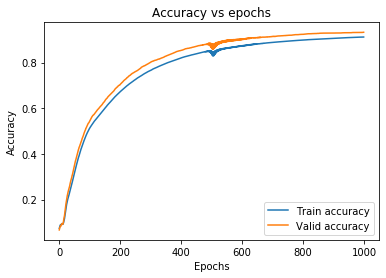

In [12]:
plt.plot(accuracy_history_train)
plt.plot(accuracy_history_valid)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy vs epochs")
plt.legend(["Train accuracy", "Valid accuracy"])

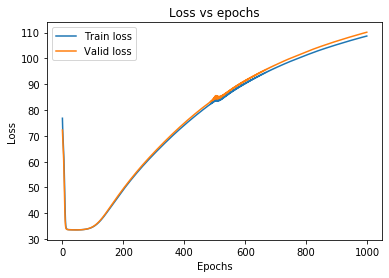

In [13]:
plt.plot(cost_history_train)
plt.plot(cost_history_valid)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs epochs")
plt.legend(["Train loss", "Valid loss"])

In [14]:
def encode_one_hot_labels(raw_labels):
    """ This function converts the categorical lebels to one-hot encoded labels 
        Input:
            raw_labels: list of int, categorical labels
        Output:
            one_hot_labels: array, one hot encoded labels
    """
    unique_classes = np.unique(raw_labels)
    one_hot_labels = np.zeros((len(raw_labels), len(unique_classes)))
    for idx, lbl in enumerate(raw_labels):
        one_hot_labels[idx][lbl] = 1
    return one_hot_labels.T

In [15]:
Y_pred = MNIST_NN.predict(testing_images, trained_params)
print("Model accuracy on testing data is: {}%".format(MNIST_NN.calc_model_accuracy(Y_pred, 
                                                                                   encode_one_hot_labels(testing_labels))*100))

Model accuracy on testing data is: 91.31%


/home/vipin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in exp


In [16]:
def plot_random_output(NN_class_object, testing_images, testing_labels, predictions):
    """ Picks a random image from testing dataset and plots output for the same 
        Input:
            NN_class_object: class object of Neural Network Class
            testing_images: list of arrays, Input Images
            testing_labels: array, raw labels associated with every image in testing_images
            predictions: array, class probablity prediction output given by neural network
        Output:
        None
    """
    rand_int = np.random.randint(0, len(testing_images))
    print("Picking random image: ", rand_int)
    plt.imshow(testing_images[rand_int])
    plt.title("Prediction vs Ground Truth")
    plt.xticks([])
    plt.yticks([])
    plt.xlabel("Ground Truth: {}".format(testing_labels[rand_int]))
    plt.ylabel("Prediction: {}".format(NN_class_object.get_class(predictions.T[rand_int])))

Picking random image:  5554


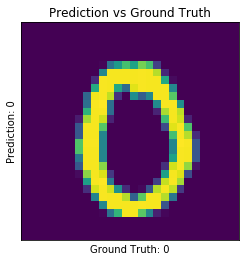

In [17]:
plot_random_output(MNIST_NN, testing_images, testing_labels, Y_pred)